In [1]:
import torch
import torch.nn as nn
from res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [2]:
set_default()

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

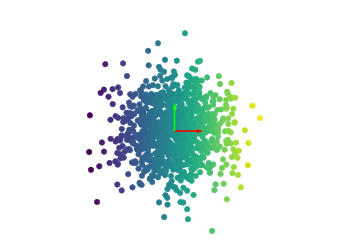

In [4]:
n_points = 1000
X = torch.randn(n_points,2).to(device)
colors = X[:,0]

show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2,2), torch.eye(2))).to(device)
plot_bases(OI)

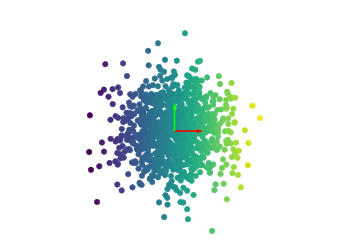

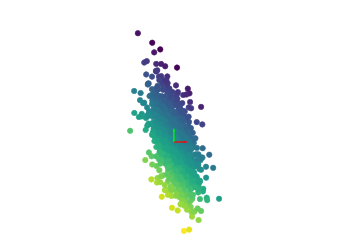

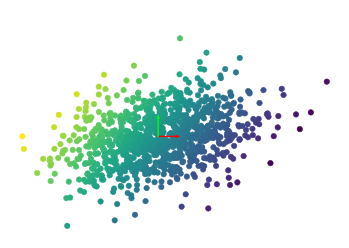

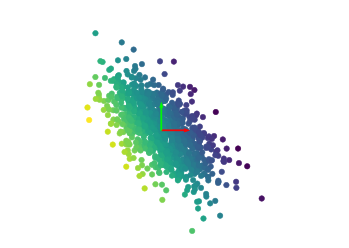

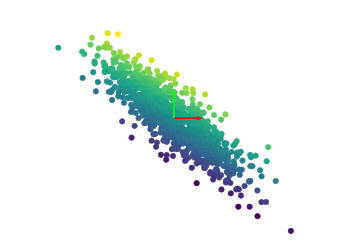

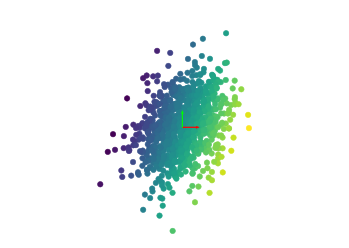

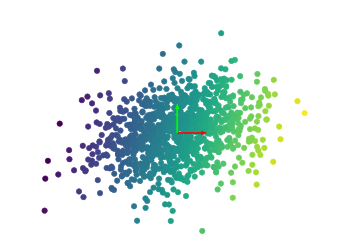

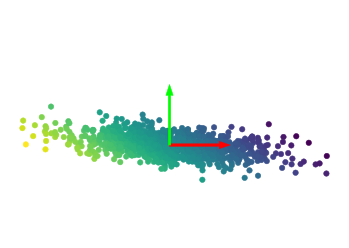

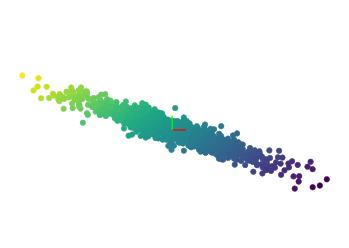

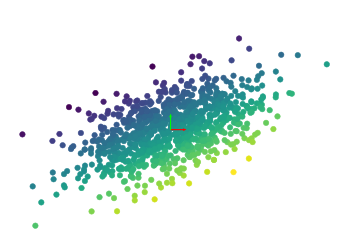

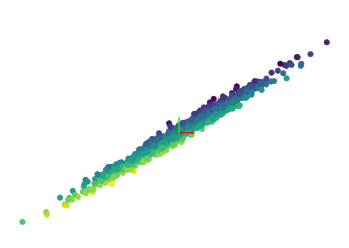

In [6]:
show_scatterplot(X,colors,title='X')
plot_bases(OI)

for i in range(10):
    # Create a random matrix
    W = torch.randn(2,2).to(device)
    # Transform points
    Y = X @ W.t()
    # Compute singular values
    U,S,V = torch.svd(W)
    # Plot transformed points
    show_scatterplot(Y,colors,title=f'y = Wx, single values: {S[0]:.3f}, {S[1]:.3f}')
    # Transform the basis
    new_OI = OI @ W.t()
    # Plot old and new basis
    plot_bases(OI)

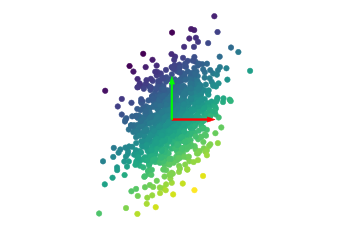

In [7]:
model = nn.Sequential(
        nn.Linear(2,2,bias=False)
)
model.to(device)

with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y,colors)
    plot_bases(OI)

Text(0.5, 1.0, 'tanh() non linearity')

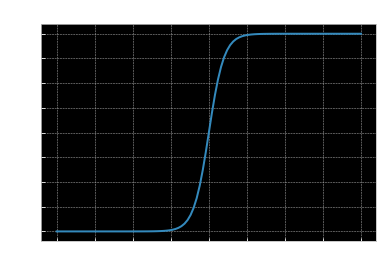

In [10]:
z = torch.linspace(-10,10,101)
s = torch.tanh(z)
plot(z.numpy(),s.numpy())
title('tanh() non linearity')

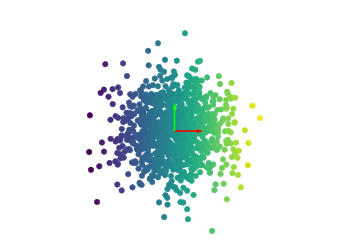

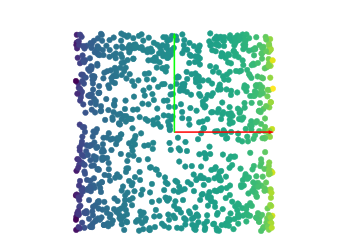

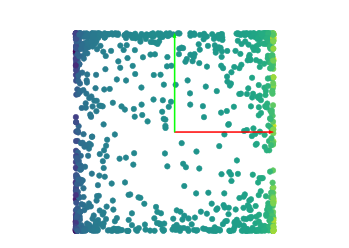

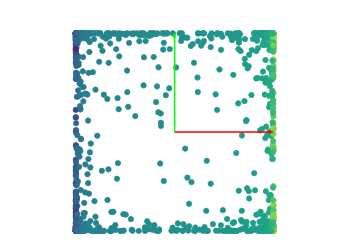

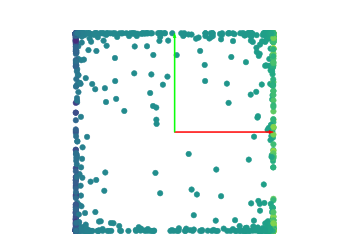

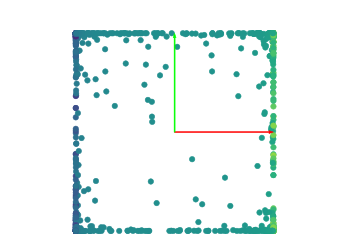

In [14]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(
        nn.Linear(2,2,bias=False),
        nn.Tanh()
)

model.to(device)

for s in range(1,6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y,colors,title=f'f(x), s={s}')
    plot_bases(OI,width=0.01)

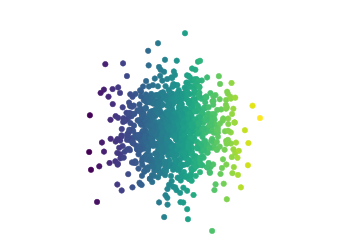

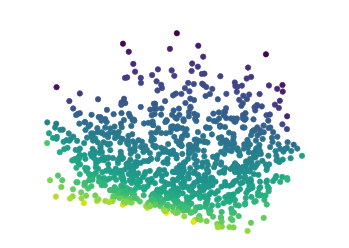

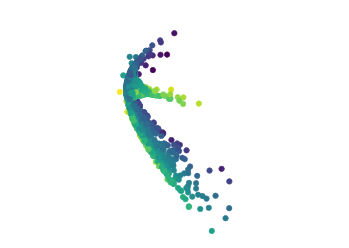

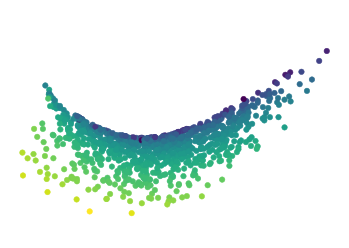

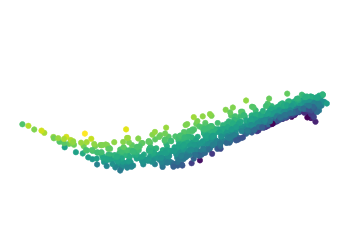

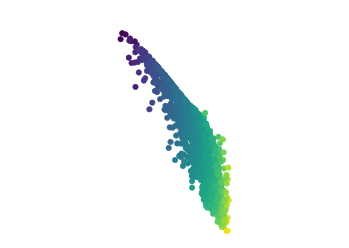

In [16]:
show_scatterplot(X,colors,title='x')
n_hidden=5

# NL = nn.Relu()
NL = nn.Tanh()

for i in range(5):
    # Create 1-layer neural network with random weights
    model = nn.Sequential(
            nn.Linear(2,n_hidden),
            NL,
            nn.Linear(n_hidden,2)
    )
    
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')
    # plot_bases(OI)

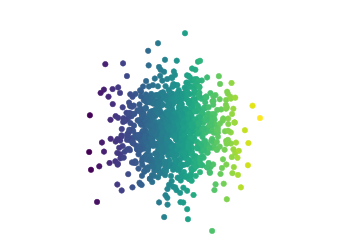

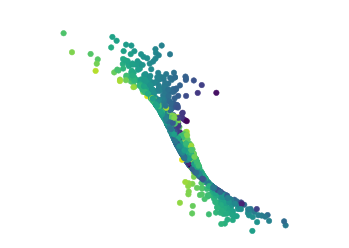

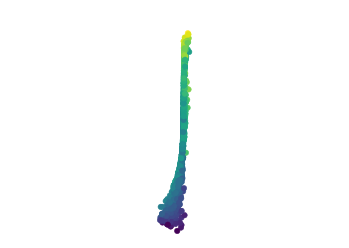

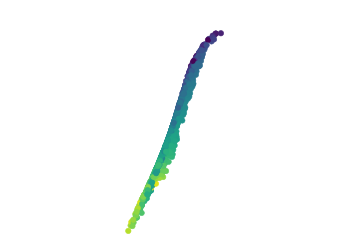

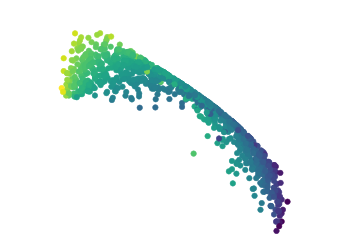

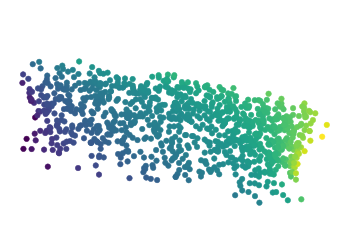

In [18]:
# Deeper neural networks with random weights
show_scatterplot(X,colors,title='x')
n_hidden=5

NL=nn.Tanh()

for i in range(5):
    model = nn.Sequential(
            nn.Linear(2, n_hidden),
            NL,
            nn.Linear(n_hidden, n_hidden),
            NL,
            nn.Linear(n_hidden, n_hidden),
            NL,
            nn.Linear(n_hidden, n_hidden),
            NL,
            nn.Linear(n_hidden, 2),
    )
    
    model.to(device)
    with torch.no_grad():
        Y = model(X)
        
    show_scatterplot(Y, colors, title='f(x)')